<a href="https://colab.research.google.com/github/monokrrome/OIBSIP/blob/main/Exploratory_Data_Analysis_on_Retail_Sales_Data_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[DATASET](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)

### **Data Loading and Cleaning**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'retail_sales_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df.dropna(inplace=True)  # Dropping missing values for simplicity

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure numerical columns are of the correct data type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

# Display the cleaned dataset
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
   Transaction ID       Date Customer ID  Gender  Age Product Category  \


### **Descriptive Statistics**

In [ ]:
# Calculate basic statistics
descriptive_stats = df.describe()
print(descriptive_stats)

# Calculate mode for categorical columns
mode_values = df.mode().iloc[0]
print(mode_values)

# Calculate median and standard deviation for numerical columns only
median_values = df.select_dtypes(include=['number']).median()
std_values = df.select_dtypes(include=['number']).std()
print(f"Median Values:\n{median_values}")
print(f"Standard Deviation Values:\n{std_values}")

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

### **Time Series Analysis**

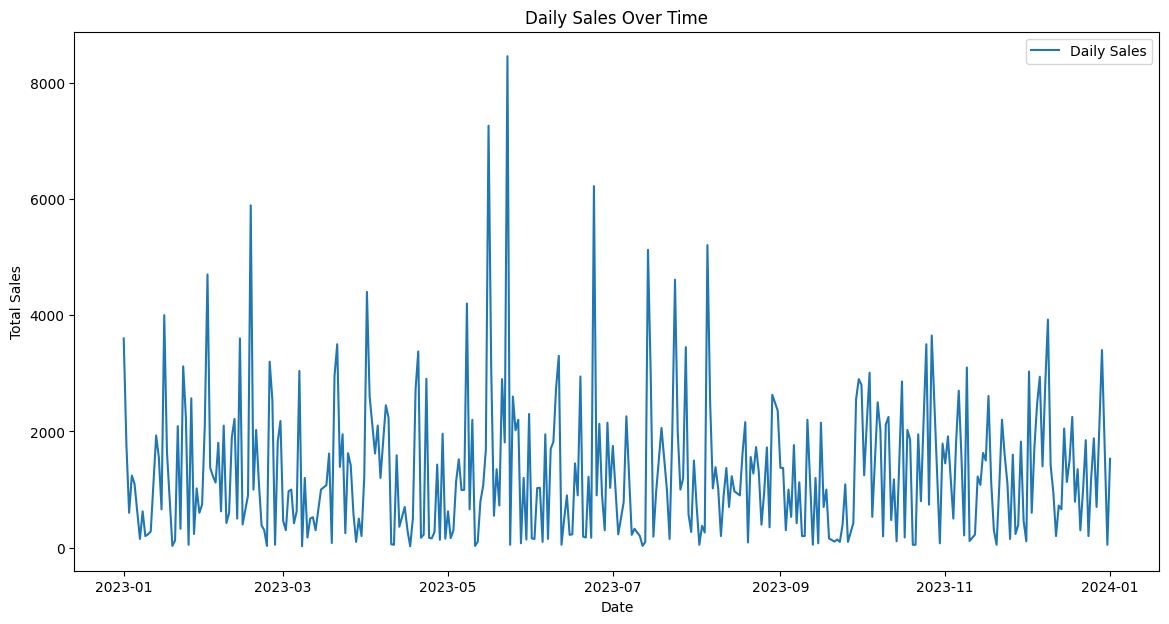

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Date' and sum the 'Total Amount' to get daily sales
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

### **Customer and Product Analysis**

Gender Distribution:
 Gender
Female    510
Male      490
Name: count, dtype: int64
Age Distribution:
 count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64


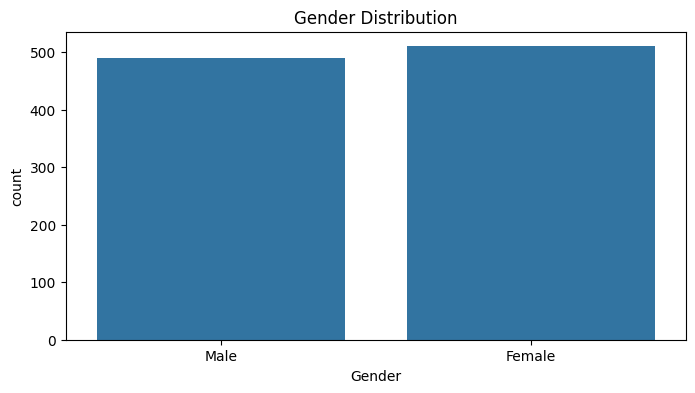

Top Customers:
 Customer ID
CUST015    2000
CUST065    2000
CUST072    2000
CUST074    2000
CUST089    2000
CUST093    2000
CUST109    2000
CUST118    2000
CUST124    2000
CUST139    2000
Name: Total Amount, dtype: int64
Top Products:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


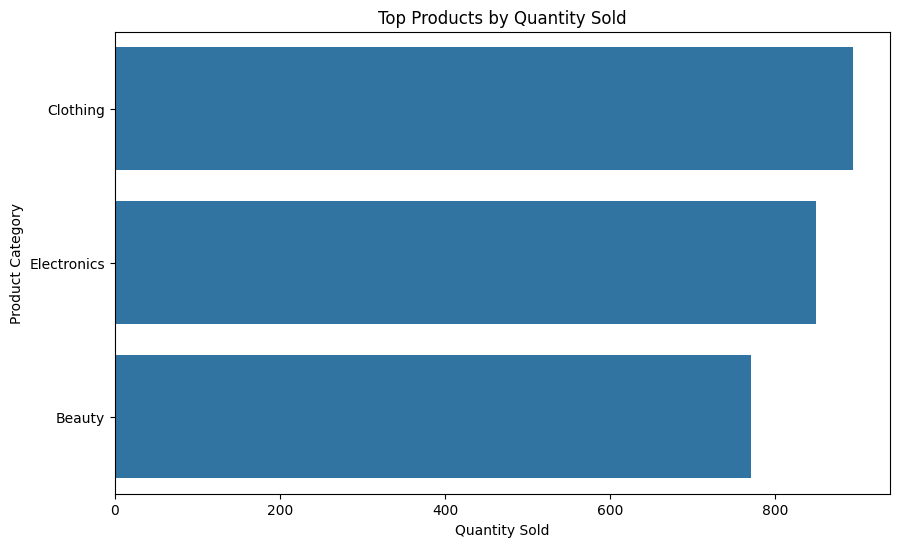

In [ ]:
import seaborn as sns

# Customer demographics analysis
gender_distribution = df['Gender'].value_counts()
age_distribution = df['Age'].describe()

print("Gender Distribution:\n", gender_distribution)
print("Age Distribution:\n", age_distribution)

# Plotting gender distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Analyzing purchasing behavior
top_customers = df.groupby('Customer ID')['Total Amount'].sum().nlargest(10)
print("Top Customers:\n", top_customers)

top_products = df.groupby('Product Category')['Quantity'].sum().nlargest(10)
print("Top Products:\n", top_products)

# Plotting top products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.show()

### **Visualization**

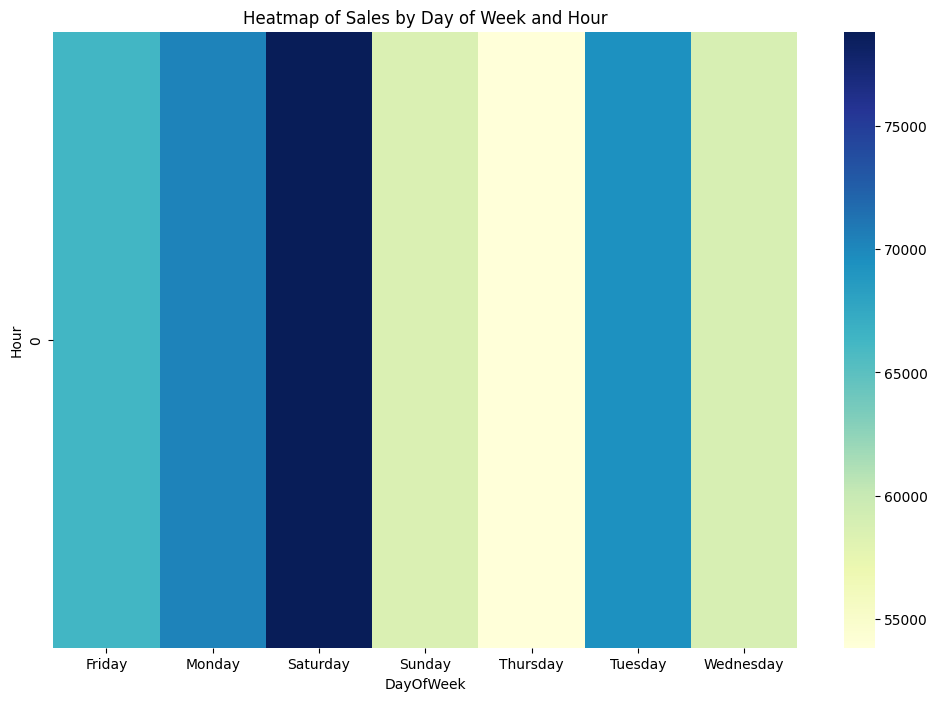

In [ ]:
# Heatmap of sales by day of the week and hour of the day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

sales_heatmap_data = df.pivot_table(values='Total Amount', index='Hour', columns='DayOfWeek', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Sales by Day of Week and Hour')
plt.show()